<a href="https://colab.research.google.com/github/AVYANBH/abhiyan_I310D/blob/main/DataCuration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Extraction

In [60]:
## Import libraries
## if you see any import error, install libraries through pip install command
try:
    from bs4 import BeautifulSoup
    import pandas
    print ("BeautifulSoup and Pandas are already installed and imported.")
except:
    import sys
    !conda install --yes --prefix {sys.prefix} bs4
    !conda install --yes --prefix {sys.prefix} pandas
    import matplotlib.pyplot as plt
    from bs4 import BeautifulSoup
    import pandas as pd
    print ("BeautifulSoup and Pandas were not found. Installed them and imported")

import requests
print ("Imported all libraries successfully.")


BeautifulSoup and Pandas are installed and imported.
Imported all libraries successfully.


In [61]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

us_cities_table_df = pd.read_csv("us-cities-table.csv")

us_cities_table_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pop2023      300 non-null    int64  
 1   pop2022      300 non-null    int64  
 2   pop2020      300 non-null    int64  
 3   pop2010      300 non-null    int64  
 4   growth       300 non-null    float64
 5   usps         300 non-null    object 
 6   geoid        300 non-null    int64  
 7   ansicode     300 non-null    int64  
 8   name         300 non-null    object 
 9   lsad         300 non-null    object 
 10  funcstat     300 non-null    int64  
 11  aland        300 non-null    int64  
 12  awater       300 non-null    int64  
 13  aland_sqmi   300 non-null    float64
 14  awater_sqmi  300 non-null    float64
 15  intptlat     300 non-null    float64
 16  intptlong    300 non-null    float64
 17  slug         300 non-null    object 
 18  metroId      300 non-null    int64  
 19  countyfi

I extracted the data from https://worldpopulationreview.com/us-cities website. There are 300 unique data points since I downloaded the dataset file from the site. There are 21 different Columns for each data points.

In [ ]:
us_cities_table_df.head()

**DATA TRANSFORMATION**

In [ ]:
top_50_cities = us_cities_table_df.head(50)


The dataset has 21 different measured values. For my project I will look at the columns of "pop2023", "name", "growth", and "rank". I used this function to get the 50 most populated cites.

# Data Summary and Vizualization

<Figure size 1400x800 with 0 Axes>

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

Text(0.5, 0, 'City')

Text(0, 0.5, 'Population / Growth Rate')

Text(0.5, 1.0, 'Top 10 Fastest-Growing Cities: Population vs. Growth Rate')

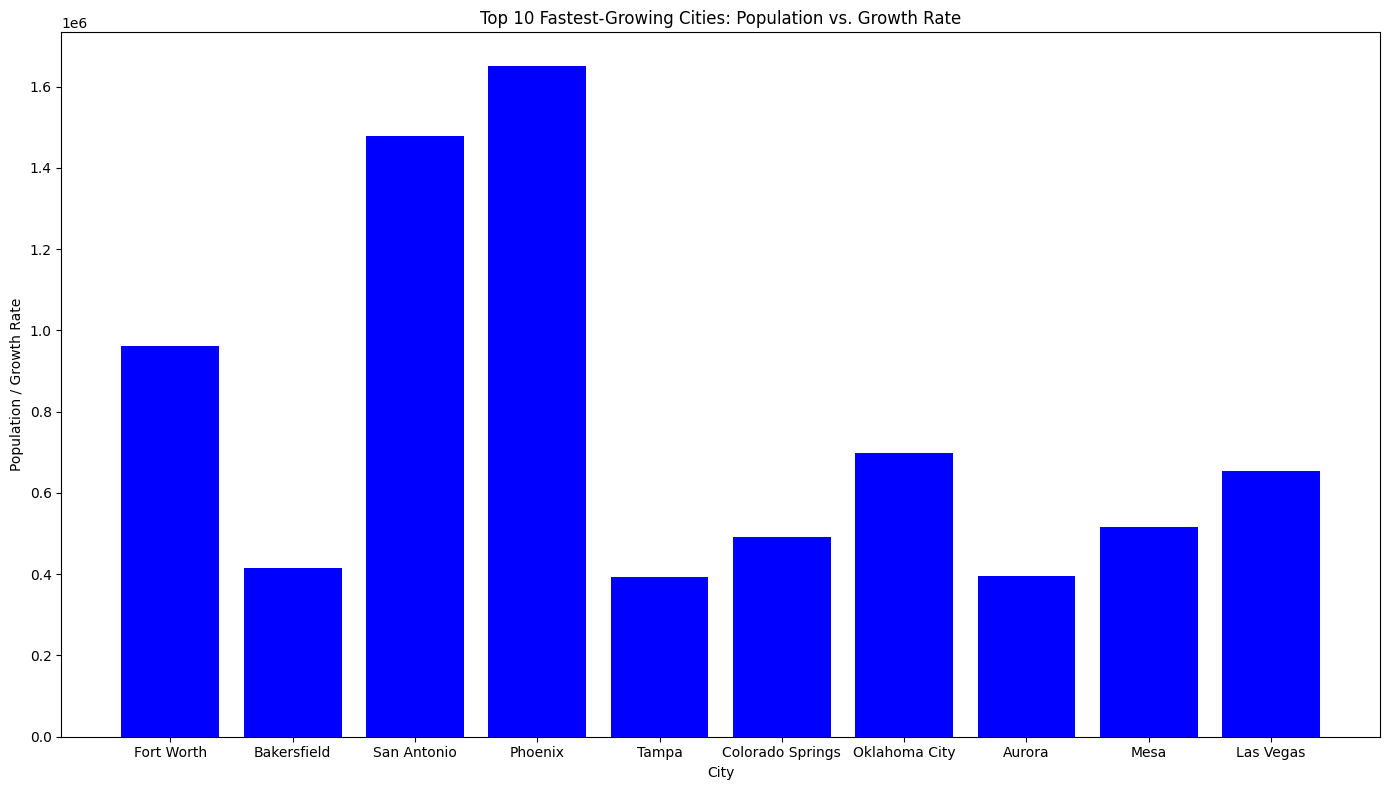

In [57]:
# A graph that compares the population of the the city with its growth rate of the top 10 fastest growing cities.

import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
us_cities_table_df = pd.read_csv("us-cities-table.csv")

# Sort the DataFrame by the 'growth' column in descending order and select the top 10 rows
top_10_fastest_growing_cities = top_50_cities.sort_values(by='growth', ascending=False).head(10)

# Create a bar graph comparing population with growth rate
plt.figure(figsize=(14, 8))
plt.bar(top_10_fastest_growing_cities['name'], top_10_fastest_growing_cities['pop2023'], label='Population', color='b')
plt.bar(top_10_fastest_growing_cities['name'], top_10_fastest_growing_cities['growth'], label='Growth Rate', color='g')
plt.xlabel('City')
plt.ylabel('Population / Growth Rate')
plt.title('Top 10 Fastest-Growing Cities: Population vs. Growth Rate')
plt.tight_layout()

# Show the graph
plt.show()


With this visualization, I put 10 cities from the top 50 most populated cities on a graph measuring their growth rate according to their population. From the graph, we can see that the large city with the highest growth rate was Phoneix, followed by San Antonio, Fort Worth, Oklahoma City, and Las Vegas in the top five. These cities are experiencing significant population growth and we can look at more indepth characteristcs of what makes these places an attractive place to move to.

<Figure size 1200x500 with 0 Axes>

<BarContainer object of 28 artists>

Text(0.5, 0, 'State')

Text(0, 0.5, 'Number of Cities in Top 50')

Text(0.5, 1.0, 'Number of Cities in the Top 50 by State')

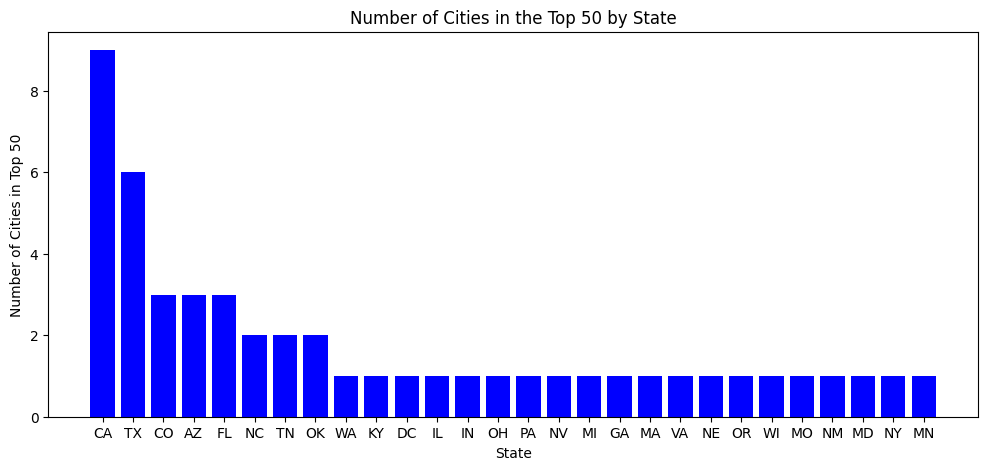

In [58]:
# Filter the DataFrame to get the top 50 cities
top_50_cities = us_cities_table_df.head(50)

# Count the number of cities for each state in the top 50
city_count_by_state = top_50_cities['usps'].value_counts().reset_index()
city_count_by_state.columns = ['State', 'Number of Cities']

# Sort the data by the number of cities in descending order for the graph
city_count_by_state = city_count_by_state.sort_values(by='Number of Cities', ascending=False)

# Create a bar graph
plt.figure(figsize=(12, 5))
plt.bar(city_count_by_state['State'], city_count_by_state['Number of Cities'], color='b')
plt.xlabel('State')
plt.ylabel('Number of Cities in Top 50')
plt.title('Number of Cities in the Top 50 by State')
#plt.xticks(rotation=45)
#plt.tight_layout()

# Show the graph
plt.show()



The graph displays the distribution of cities in the top 50 based on the number of cities from each U.S. state. Each bar on the graph represents a state, and its height corresponds to the number of cities from that state that are ranked in the top 50.

From the graph, we can observe that a few states, such as California, Texas, and Florida, have a notable presence in the top 50 cities. This suggests that these states host multiple cities that are among the top 50 in terms of certain criteria, which could include factors like population, economic development, or quality of life.